In [5]:
#Data Analysis of Relative Humidity 1950-2022
##Humidity rates 

## @author Yasmin Abdalla
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('WB_CCKP_HURS.csv')
df.head()
df.isnull().sum()
df.describe()

,TIME_PERIOD,OBS_VALUE,UNIT_MULT,TIME_FORMAT
count,17155.000000,17155.000000,17155.0,17155.0
mean,1986.000000,71.323997,0.0,602.0
std,21.071922,13.622156,0.0,0.0
min,1950.000000,22.700000,0.0,602.0
25%,1968.000000,65.890000,0.0,602.0
50%,1986.000000,76.620000,0.0,602.0
75%,2004.000000,80.690000,0.0,602.0
max,2022.000000,89.050000,0.0,602.0


In [80]:
#Missing Values
df['OBS_VALUE']=df['OBS_VALUE'].ffill()


# Question 1: The countries with the highest, lowest, and average humidity rates
###Relative Humidity in countries with ratings

In [14]:
top_countries=df.groupby('REF_AREA_LABEL')['OBS_VALUE'].mean().round(2).nlargest(10)  
print(top_countries)


REF_AREA_LABEL
Equatorial Guinea    87.62
Papua New Guinea     86.81
Brunei Darussalam    86.77
Solomon Islands      85.73
Panama               85.61
Indonesia            85.57
Malaysia             85.55
Ecuador              85.01
Costa Rica           84.73
Liberia              84.60
Name: OBS_VALUE, dtype: float64


In [13]:
lowest_countries=df.groupby('REF_AREA_LABEL')['OBS_VALUE'].mean().round(2).nsmallest(10)
print(lowest_countries)



REF_AREA_LABEL
Niger               25.95
Mauritania          28.66
Algeria             30.36
Mali                30.52
Saudi Arabia        31.09
Chad                31.74
Sudan               33.11
Kuwait              35.48
Libya               36.21
Egypt, Arab Rep.    38.89
Name: OBS_VALUE, dtype: float64


In [12]:
#Calculating the average
average_countries=df.groupby('REF_AREA_LABEL')['OBS_VALUE'].mean()
average_rounding=average_countries.round(2)
print(average_rounding)



REF_AREA_LABEL
Afghanistan               46.07
Albania                   71.94
Algeria                   30.36
American Samoa            81.80
Andorra                   74.45
                          ...  
Wallis-et-Futuna (Fr.)    81.92
West Bank and Gaza        61.64
Yemen, Rep.               42.92
Zambia                    60.59
Zimbabwe                  58.18
Name: OBS_VALUE, Length: 235, dtype: float64


# Question 2: Data visualization of humidity rates 


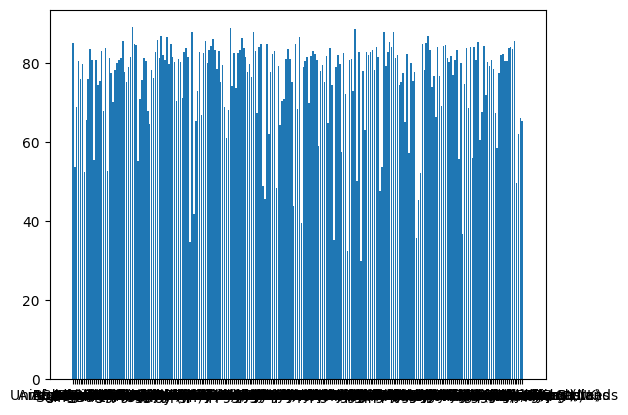

In [106]:
plt.bar(df.REF_AREA_LABEL, df.OBS_VALUE)
plt.show()


# Question 3: Recent years of humidity for the past 5 years

In [96]:
recent_df=df[df['TIME_PERIOD']>=2018]
data=recent_df[['TIME_PERIOD', 'OBS_VALUE']].to_numpy()
print(data)


[[2018.     84.12]
 [2019.     84.24]
 [2020.     83.07]
 ...
 [2020.     58.4 ]
 [2021.     59.5 ]
 [2022.     60.44]]


# Question 4: Global average of humdity

In [58]:
yearly_avg=df.groupby('TIME_PERIOD')['OBS_VALUE'].mean()
print(yearly_avg)

TIME_PERIOD
1950    71.209745
1951    71.674936
1952    71.140723
1953    71.826426
1954    71.268851
          ...    
2018    70.792766
2019    70.290553
2020    70.378511
2021    69.993872
2022    70.097574
Name: OBS_VALUE, Length: 73, dtype: float64


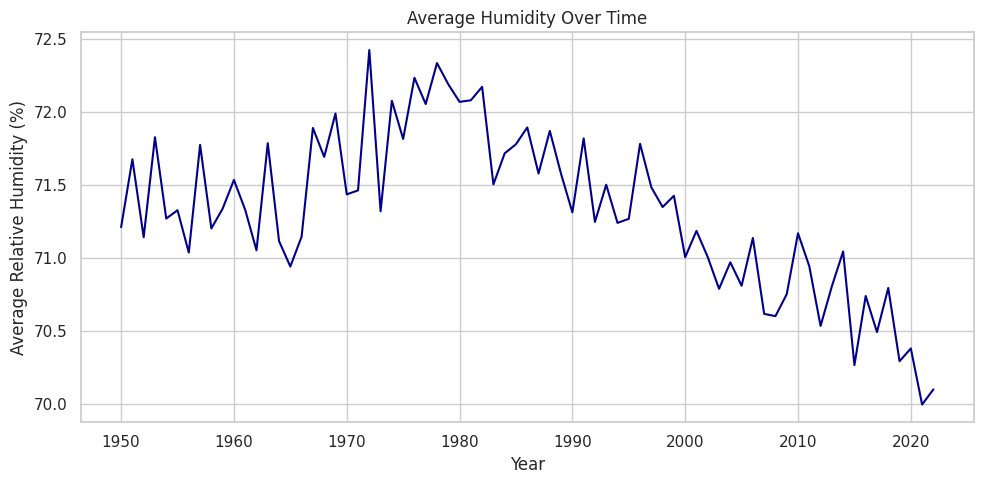

In [117]:
avg=df.groupby('TIME_PERIOD')['OBS_VALUE'].mean().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg, x='TIME_PERIOD', y='OBS_VALUE', color='darkblue')
plt.title("Average Humidity Over Time")
plt.xlabel("Year")
plt.ylabel("Average Relative Humidity (%)")
plt.tight_layout()
plt.show()

# Question 5: Highest country with humidity

In [34]:
import numpy as np
country_matrix=country_data[['TIME_PERIOD', 'OBS_VALUE']].values
print(country_matrix)


[[1950.     84.64]
 [1951.     88.08]
 [1952.     87.16]
 [1953.     86.83]
 [1954.     86.35]
 [1955.     86.58]
 [1956.     86.69]
 [1957.     86.49]
 [1958.     86.28]
 [1959.     86.38]
 [1960.     87.68]
 [1961.     87.18]
 [1962.     86.26]
 [1963.     87.15]
 [1964.     86.98]
 [1965.     87.3 ]
 [1966.     87.33]
 [1967.     88.84]
 [1968.     88.28]
 [1969.     88.22]
 [1970.     88.73]
 [1971.     87.8 ]
 [1972.     88.24]
 [1973.     88.61]
 [1974.     88.75]
 [1975.     88.44]
 [1976.     88.66]
 [1977.     88.89]
 [1978.     88.5 ]
 [1979.     88.89]
 [1980.     88.43]
 [1981.     88.55]
 [1982.     88.87]
 [1983.     87.74]
 [1984.     88.35]
 [1985.     88.58]
 [1986.     88.  ]
 [1987.     88.21]
 [1988.     88.24]
 [1989.     87.58]
 [1990.     88.46]
 [1991.     87.72]
 [1992.     88.01]
 [1993.     87.98]
 [1994.     87.86]
 [1995.     87.64]
 [1996.     87.61]
 [1997.     87.75]
 [1998.     88.01]
 [1999.     88.42]
 [2000.     88.27]
 [2001.     87.42]
 [2002.     

# Question 6: Including highest humidity rate recorded and lowest rating

In [42]:
#Highest recorded humidity
max_humidity=df['OBS_VALUE'].max()
max_humidity_data=df[df['OBS_VALUE']==max_humidity]
print("Highest Recorded Humidity:")
print(max_humidity_data[['REF_AREA_LABEL','TIME_PERIOD','OBS_VALUE']])




Highest Recorded Humidity:
                 Region  Year  Humidity (%)
2269  Brunei Darussalam  1956         89.05


In [44]:
#Lowest recorded humidity
min_humidity = df['OBS_VALUE'].min()
min_humidity_data = df[df['OBS_VALUE']==min_humidity]

#Rename columns
min_humidity_data=min_humidity_data.rename(columns={
    'REF_AREA_LABEL': 'Region',
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Humidity (%)'
})
print("Lowest Recorded Humidity:")
print(min_humidity_data[['Region', 'Year', 'Humidity (%)']])


Lowest Recorded Humidity:
      Region  Year  Humidity (%)
10984  Niger  1984          22.7


In [46]:
import numpy as np
regions=np.array(['Equatorial Guinea', 'Papua New Guinea', 'Brunei Darussalam', 'Solomon Islands'])
years=np.array([1950, 1951, 1952, 1953])
humidities=np.array([87.62, 86.81, 86.77, 85.73])
lowest_index=np.argmin(humidities)
region=regions[lowest_index]
year=years[lowest_index]
humidity=humidities[lowest_index]
print("Lowest Recorded Humidity:")
print(f"Region: {region}, Year: {year}, Humidity: {humidity}%")

Lowest Recorded Humidity:
Region: Solomon Islands, Year: 1953, Humidity: 85.73%


# Question 7: Seasonal patterns and times

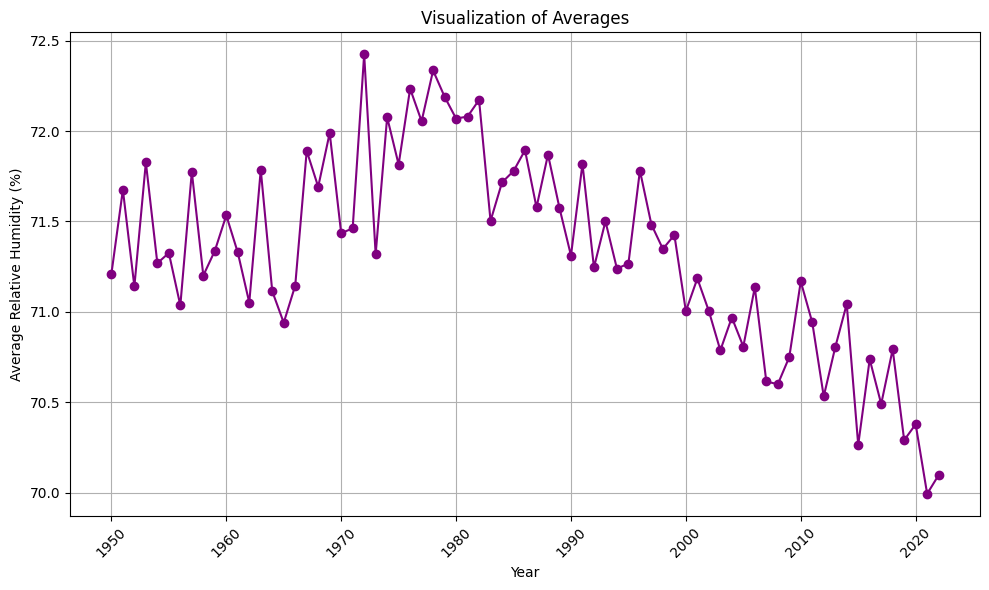

In [103]:
#Seasonal Analysis Average
seasonal_avg = df.groupby('TIME_PERIOD')['OBS_VALUE'].mean()
seasonal_avg = seasonal_avg.reset_index()
seasonal_avg = seasonal_avg.rename(columns={
    'TIME_PERIOD': 'Year',
    'OBS_VALUE': 'Average Relative Humidity (%)'
})
plt.figure(figsize=(10, 6))
plt.plot(seasonal_avg['Year'], seasonal_avg['Average Relative Humidity (%)'], marker='o', color='purple')
plt.title('Visualization of Averages')
plt.xlabel('Year')
plt.ylabel('Average Relative Humidity (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


# Question 8: Humditity Changes

In [74]:
df['Humidity_Change']=df['OBS_VALUE'].diff()
print("Humidity Changes Over Time:")
print(df[['TIME_PERIOD', 'OBS_VALUE', 'Humidity_Change']].head())

Humidity Changes Over Time:
   TIME_PERIOD  OBS_VALUE  Humidity_Change
0         1950      83.85              NaN
1         1951      83.19            -0.66
2         1952      83.59             0.40
3         1953      83.33            -0.26
4         1954      83.88             0.55


In [81]:

corr_matrix=df[['OBS_VALUE', 'Humidity_Change']].corr()
print(corr_matrix)


                 OBS_VALUE  Humidity_Change
OBS_VALUE         1.000000         0.109435
Humidity_Change   0.109435         1.000000


###Weak correlation of 0.109435,perfect correlation of 1 

# Question 9: Time periods with similar humidity ratings

In [82]:
#Grouping by time period
grouped=df.groupby('TIME_PERIOD')['OBS_VALUE'].mean()
print(grouped)


TIME_PERIOD
1950    71.209745
1951    71.674936
1952    71.140723
1953    71.826426
1954    71.268851
          ...    
2018    70.792766
2019    70.290553
2020    70.378511
2021    69.993872
2022    70.097574
Name: OBS_VALUE, Length: 73, dtype: float64


# Question 10: Urbanization Data
Average humidity rate based on urbanization level. 

In [92]:
urban=df.groupby('URBANISATION_LABEL')['OBS_VALUE'].mean().round(2)
print("Urbanization Analysis Average Relative Humidity:")
print(urban)


Urbanization Analysis Average Relative Humidity:
URBANISATION_LABEL
Total    71.32
Name: OBS_VALUE, dtype: float64
